# EDA

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt



In [2]:
df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\CourseProjects\InsurancePremiumPrediction\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

LabelEncoding

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [7]:
df['smoker'] = encoder.fit_transform(df['smoker'])

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [11]:
df = pd.get_dummies(df, columns = ['region'])

In [12]:
df.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,False,False,False,True
1,18,1,33.8,1,0,1725.55,False,False,True,False
2,28,1,33.0,3,0,4449.46,False,False,True,False
3,33,1,22.7,0,0,21984.47,False,True,False,False
4,32,1,28.9,0,0,3866.86,False,True,False,False


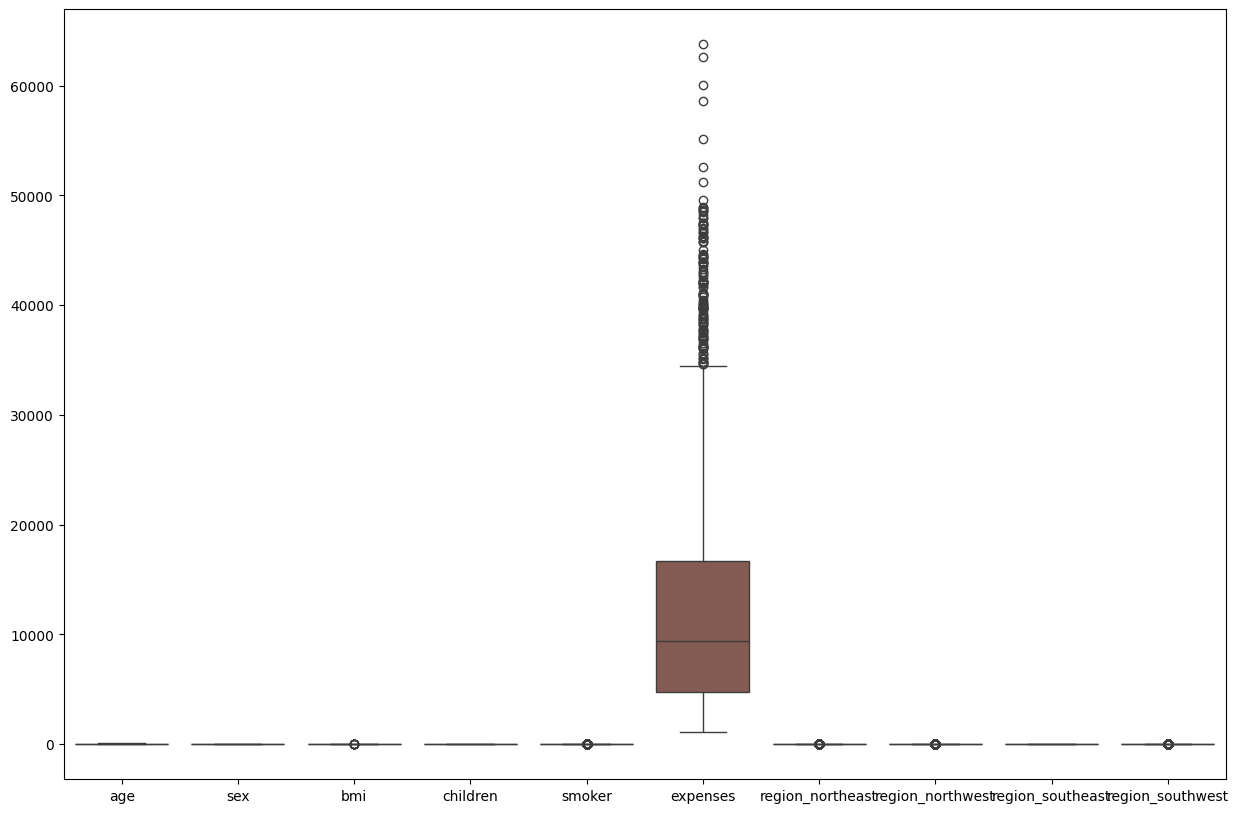

In [15]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = df)
plt.show()

In [18]:
print(df.isnull().sum())

age                 0
sex                 0
bmi                 0
children            0
smoker              0
expenses            0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


In [20]:
df['expenses'].std()

np.float64(12110.011239706468)

In [21]:
df['expenses'].max()

np.float64(63770.43)

In [22]:
df['expenses'].min()

np.float64(1121.87)

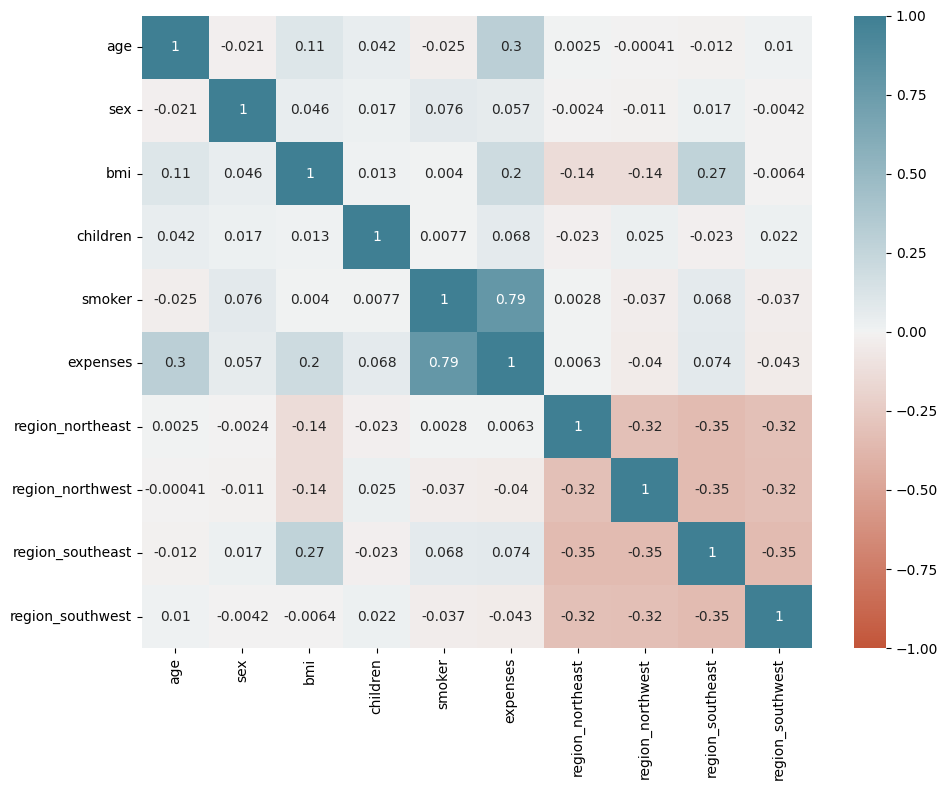

In [30]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(df.corr(), vmin = -1, vmax = 1,
                 cmap = sns.diverging_palette(20, 220, as_cmap = True),
                 ax = ax, annot = True)
plt.tight_layout()
plt.show()

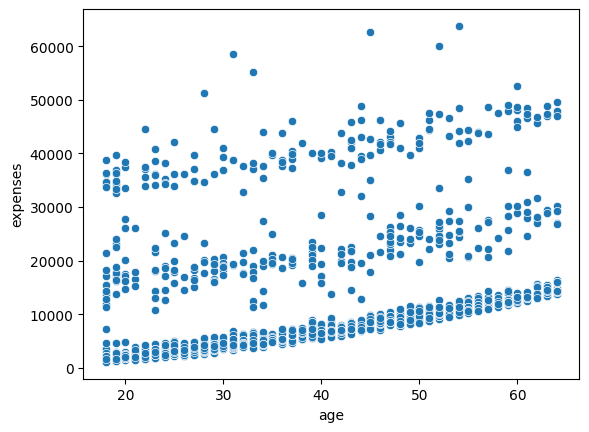

In [40]:
sns.scatterplot(data = df, x = 'age', y = 'expenses')
plt.show()

In [41]:
X = df.drop('expenses', axis = 1)
y = df['expenses']

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [79]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dtr.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = dtr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(r2)
print(mse)

0.8320641170379122
26071833.17719188


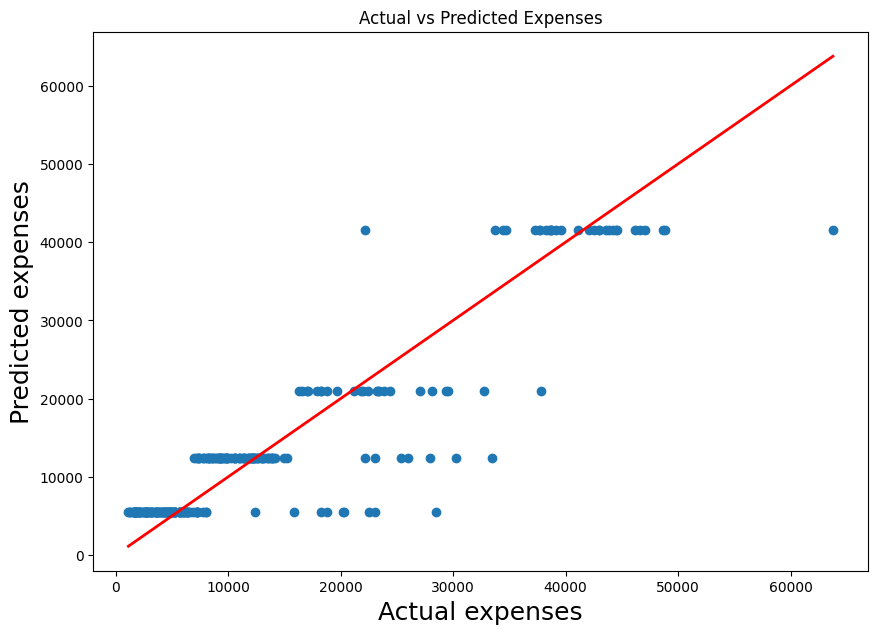

In [81]:
plt.figure(figsize = (10, 7))
plt.scatter(x = y_test, y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Expenses')
plt.xlabel('Actual expenses', fontsize = 18)
plt.ylabel('Predicted expenses', fontsize = 18)

plt.show()

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3,
                                 learning_rate = 1.0, random_state = 42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [84]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = gbrt.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(r2)
print(mse)

0.8475406942289754
23669114.165850963


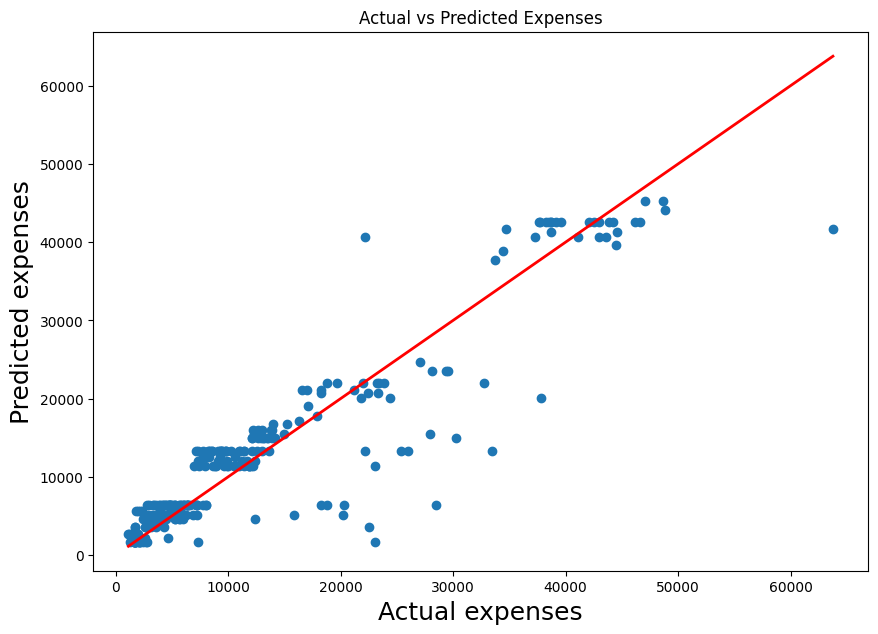

In [85]:
plt.figure(figsize = (10, 7))
plt.scatter(x = y_test, y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Expenses')
plt.xlabel('Actual expenses', fontsize = 18)
plt.ylabel('Predicted expenses', fontsize = 18)

plt.show()

In [87]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model = reg_model.fit(X_train, y_train)

In [88]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = reg_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(r2)
print(mse)

0.7835726930039906
33600065.355077825


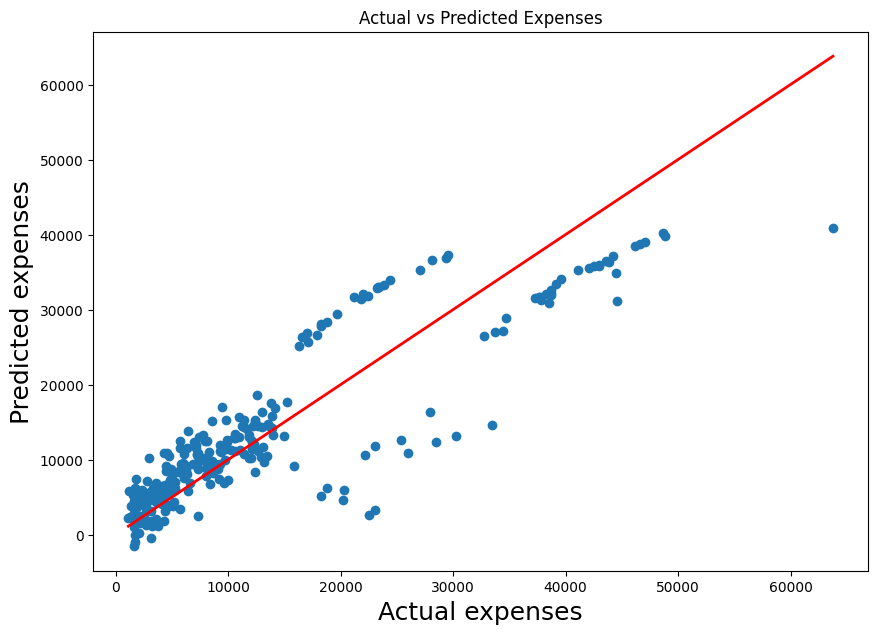

In [89]:
plt.figure(figsize = (10, 7))
plt.scatter(x = y_test, y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Expenses')
plt.xlabel('Actual expenses', fontsize = 18)
plt.ylabel('Predicted expenses', fontsize = 18)

plt.show()